In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null

E: Package 'python-software-properties' has no installation candidate


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/'My Drive'/'CIS 520 Project'

[Errno 2] No such file or directory: '/content/drive/My Drive/CIS 520 Project'
/content


In [6]:
ls

 baselines.ipynb               tfidf50k.mm
'CIS 520 Project Notes.gdoc'   tfidf50k.mm.index
 dataclean.ipynb               word2vec_embed20.bin
 gensim50k.dict                word2vec_embed20.bin.trainables.syn1neg.npy
 restaurant_reviews.csv        word2vec_embed20.bin.wv.vectors.npy
 reviews_bow.csv               word2vec_embed.bin
 reviews_trim.csv              word2vec_embed.bin.trainables.syn1neg.npy
 sparse50k.mm                  word2vec_embed.bin.wv.vectors.npy
 sparse50k.mm.index            word2vec_embed.ipynb


In [0]:
#imports
import warnings
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
from matplotlib import pyplot
from collections import Counter
import seaborn as sns

In [0]:
def get_data(csvfile):
  df = pd.read_pickle(csvfile)
  x, y = df['text'].tolist(), df['stars_x'].tolist()
  return x, y

In [0]:
def trim_csv(csvtrim):
  #1million - 200 words
  df = pd.read_pickle(csvfile)
  df = df.head(1000000)
  df['text'] = df['text'].apply(lambda x: x[:200])
  df.to_pickle('reviews_trim.csv')

In [0]:
csvfile = 'reviews_bow.csv'
reviews, stars = get_data(csvfile)

In [0]:
def create_word2vec(reviews, embed_file, size=100, window=10, min_count=2, workers=10, it=5):
  model = Word2Vec(reviews, size=size, window=window, min_count=min_count, workers=workers, iter=it)
  words = list(model.wv.vocab)
  # words = model.wv.vocab
  model.save(embed_file)
  return model, words

In [0]:
def load_word2vec(embed_file):
  model = Word2Vec.load(embed_file)
  words = list(model.wv.vocab)
  return model, words

In [11]:
embed_file = 'word2vec_embed20.bin'
summary, word_dict = load_word2vec(embed_file)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


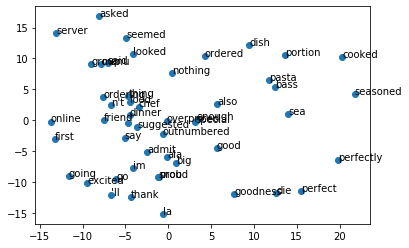

In [12]:
num_words = 50
X_vis = summary[word_dict[:num_words]]
pca = PCA(n_components=2)
result = pca.fit_transform(X_vis)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(summary.wv.vocab)
for i, word in enumerate(words):
  if i>num_words-1:
    break
  else:
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [13]:
#data stats
print("distribution for stars: ", Counter(stars))
maxlen = max([len(ls) for ls in reviews])
print("max length of sentence: ", maxlen)
print("lenght of vocab: ", len(list(word_dict)))

distribution for stars:  Counter({5: 1202526, 4: 741673, 3: 351558, 1: 278455, 2: 236130})
max length of sentence:  1332
lenght of vocab:  271561


In [14]:
#data stats
print("distribution for stars: ", Counter(stars[:1000000]))
len_list = [len(ls) for ls in reviews]
maxlen = max(len_list[:1000000])
print('Average length of reviews: ', np.mean(np.array(len_list[:1000000])), np.std(np.array(len_list[:1000000])))
print("max length of sentence: ", maxlen)
print("lenght of vocab: ", len(list(word_dict)))

distribution for stars:  Counter({5: 430627, 4: 264870, 3: 125090, 1: 96158, 2: 83255})
Average length of reviews:  56.25968 52.11489004399413
max length of sentence:  905
lenght of vocab:  271561


Text(0, 0.5, 'Flights')

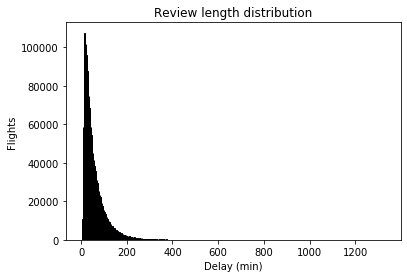

In [15]:
import matplotlib.pyplot as plt

# matplotlib histogram
plt.hist(len_list, color = 'blue', edgecolor = 'black',
         bins = maxlen)
plt.title('Review length distribution')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [35]:
frequency, bins = np.histogram(np.array(len_list[:1000000]), bins=10, range=[0, 1000])
for b, f in zip(bins[1:], frequency):
    print(round(b, 1), f)
#     print(round(b, 1), ' '.join(np.repeat('*', f)))
np.where(np.array(len_list[:1000000])==1332)

100.0 857951
200.0 117928
300.0 18275
400.0 4097
500.0 1530
600.0 205
700.0 8
800.0 2
900.0 3
1000.0 1


(array([], dtype=int64),)

In [0]:
from gensim import corpora
from gensim import matutils
from gensim.models import LsiModel, KeyedVectors
from gensim.models.tfidfmodel import TfidfModel
from gensim.corpora import Dictionary
from gensim.matutils import corpus2dense
import matplotlib.pyplot as plt

In [0]:
def create_gensim_dict(reviews):
  reviews_dict = Dictionary(reviews, prune_at = 50000)
  best = reviews_dict.token2id['best']
  print(best)
  reviews_dict.save('gensim50k.dict')  # store the dictionary, for future reference
  print(reviews_dict[10000])

In [18]:
reviews_dict = corpora.Dictionary.load('gensim50k.dict')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
#create a sparse
def create_bow(reviews, reviews_dict):
  reviews_bow = [reviews_dict.doc2bow(r) for r in reviews]
  display(reviews_bow)
  #store the value
  corpora.MmCorpus.serialize('sparse50k.mm', reviews_bow)  # store to disk, for later use

In [28]:
reviews_bow = corpora.MmCorpus('sparse50k.mm')
print(reviews_bow[0])

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[(0, 2.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 2.0), (5, 1.0), (6, 1.0), (7, 3.0), (8, 1.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 1.0), (13, 1.0), (14, 1.0), (15, 2.0), (16, 2.0), (17, 1.0), (18, 1.0), (19, 1.0), (20, 1.0), (21, 1.0), (22, 2.0), (23, 1.0), (24, 1.0), (25, 2.0), (26, 1.0), (27, 1.0), (28, 1.0), (29, 1.0), (30, 2.0), (31, 1.0), (32, 1.0), (33, 1.0), (34, 1.0), (35, 1.0), (36, 1.0), (37, 1.0), (38, 2.0), (39, 1.0), (40, 1.0), (41, 1.0), (42, 1.0), (43, 4.0), (44, 1.0), (45, 4.0), (46, 1.0), (47, 1.0), (48, 3.0), (49, 1.0), (50, 1.0), (51, 1.0), (52, 1.0), (53, 1.0), (54, 1.0), (55, 1.0), (56, 1.0), (57, 1.0), (58, 1.0), (59, 2.0), (60, 1.0), (61, 1.0), (62, 1.0), (63, 1.0), (64, 1.0), (65, 1.0), (66, 1.0), (67, 1.0), (68, 1.0), (69, 1.0), (70, 4.0), (71, 1.0), (72, 1.0), (73, 1.0), (74, 1.0), (75, 1.0), (76, 1.0), (77, 1.0), (78, 1.0), (79, 1.0), (80, 1.0), (81, 1.0), (82, 2.0), (83, 1.0), (84, 2.0), (85, 1.0), (86, 1.0), (87, 1.0), (88, 1.0), (89, 1.0), (90, 1.0), (91, 1.0

In [0]:
def plot_values(reviews, function=None):
    values = []
    for doc in reviews:
        for (word, score) in doc:
            if not function: values.append(score)
            else:            values.append(function(score))

    plt.hist(values - np.mean(values), bins='auto')
    plt.show()

In [0]:
def make_tfidf(reviews_bow):
    model = TfidfModel(reviews_bow, normalize=True)
    # print(type(reviews_bow), len(reviews_bow))
    tf = model[reviews_bow]
    corpora.MmCorpus.serialize('tfidf50k.mm', tf)  # store to disk, for later use
    return tf

In [23]:
reviews_tfidf = make_tfidf(reviews_bow)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [21]:
reviews_tfidf = corpora.MmCorpus('tfidf50k.mm')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
plot_values(reviews_tfidf)

In [23]:
print((reviews_tfidf[0]))

[(0, 0.08520045483265656), (1, 0.05017847762669323), (2, 0.047923604500168054), (3, 0.020452066547426796), (4, 0.08562811404224095), (5, 0.10118398182297537), (6, 0.11669956351064478), (7, 0.09920441110998741), (8, 0.07349485209201806), (9, 0.059594599037470906), (10, 0.058006258359631094), (11, 0.04895122791183557), (12, 0.05868574399306137), (13, 0.053815309738574374), (14, 0.0783750450201483), (15, 0.21755332969729532), (16, 0.10600310385335338), (17, 0.04758889505340977), (18, 0.07258056099471641), (19, 0.09676210355862029), (20, 0.08777783435733387), (21, 0.06810659805893153), (22, 0.07503856516014674), (23, 0.08799059421602613), (24, 0.0552949214629728), (25, 0.1428365633160295), (26, 0.07544887965511887), (27, 0.054806042575064016), (28, 0.08092756931587637), (29, 0.044963125877757595), (30, 0.08879265070399782), (31, 0.05391073413063964), (32, 0.03789740055943037), (33, 0.0786947353210207), (34, 0.06872844844384836), (35, 0.05506635721172289), (36, 0.14115733806006994), (37, 0.

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
from operator import itemgetter
#trim to 200 words
numwords = 200
def trimbow(reviews):
  trimmed = np.zeros((len(reviews), numwords))
  for i in range(len(reviews)):
    size = len(reviews[i])
    print(list(map(itemgetter(1), reviews[i])))
    print(trimmed[i])
    trimmed[i][:size] = list(map(itemgetter(1), reviews[i]))
    break
  return trimmed

In [10]:
#imports 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from sklearn.naive_bayes import MultinomialNB 
import tensorflow as tf
tf.test.gpu_device_name()

Using TensorFlow backend.


'/device:GPU:0'

In [12]:
#preparing X and y!!!
csvfile = 'reviews_trim.csv'
reviews, stars = get_data(csvfile)
warnings.filterwarnings("ignore")
tempy, tempx = stars[:1000000], reviews[:1000000]
print('Data loaded')

#preparing y
y = np.array(tempy, dtype=np.uint8)
ymulti = y-1
y = to_categorical(ymulti, num_classes=5)
print('y prepared')

#preparing x
vocab_size = 20000 #will use most frequent 50k words
num_words = 200 #97%coverage for reviews
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(tempx)
sequences = tokenizer.texts_to_sequences(tempx)
padded_str = pad_sequences(sequences, maxlen = num_words)
#type changed here to use less memory 
x = np.array(padded_str, dtype=np.uint16)
print('x prepared')

Data loaded
X train shape:  [[    0     0     0 ...   693   197    61]
 [    0     0     0 ...   289  3437    31]
 [    0     0     0 ...   542    12  3576]
 ...
 [    0     0     0 ...     8     1     3]
 [    0     0     0 ...  1596  3026   844]
 [    0     0     0 ...   418     3 18491]]  y train shape:  [[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


In [0]:
def simple_LSTM(shape):
    model = Sequential()
    model.add(Embedding(vocab_size, 128))
    # model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [0]:
def MultinomialNBTrain(X_train, X_test, y_train, y_test):
  clf = MultinomialNB().fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(metrics.accuracy_score(y_test, y_pred))
  print(metrics.classification_report(y_test, y_pred))

In [16]:
#train simple
#NAIVE BAYES
#train-test
X_train, X_test, y_train, y_test = train_test_split(x, ymulti, test_size=0.33, random_state=42, stratify = y)
print('X train shape: ', type(X_train), ' y train shape: ', type(y_train))
print('X train type: ', X_train.shape, ' y train type: ', y_train.shape)

MultinomialNBTrain(X_train, X_test, y_train, y_test)

X train shape:  <class 'numpy.ndarray'>  y train shape:  <class 'numpy.ndarray'>
X train type:  (670000, 200)  y train type:  (670000,)
0.4059878787878788
              precision    recall  f1-score   support

           0       0.12      0.00      0.01     31732
           1       0.13      0.08      0.10     27474
           2       0.17      0.19      0.18     41280
           3       0.29      0.05      0.09     87407
           4       0.47      0.84      0.60    142107

    accuracy                           0.41    330000
   macro avg       0.24      0.23      0.20    330000
weighted avg       0.33      0.41      0.32    330000



In [2]:
#LSTM
#train-test
X_train, X_test, y_train, y_test = train_test_split(padded_str, y, test_size=0.33, random_state=42, stratify = y)
print('X train shape: ', type(X_train), ' y train shape: ', type(y_train))
print('X train type: ', X_train.shape, ' y train type: ', y_train.shape)

model = simple_LSTM(X_train.shape)
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose = 1)
scores = model.evaluate(X_test, y_test, verbose=0)
pred = model.predict_classes(X_test)
y_int = [np.argmax(r) for r in y_test]
print('predicted classes: ', pred, '\n actual classes:',y_int)
print(metrics.accuracy_score(y_int, pred))
print(metrics.classification_report(y_int, pred))

NameError: ignored

In [0]:
x = [['the', 'world'], ['upon']]
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(reviews[:10])
sequences = tokenizer.texts_to_sequences(reviews[:10])
pd = pad_sequences(sequences, maxlen=maxlen)
type(sequences)
pd